In [7]:
import csv
import os
import glob
import pandas as pd
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

path = 'archive'
files = glob.glob(path + "/*.csv")

stocks = []
data_frame = pd.DataFrame()
content = []
  
df = pd.read_csv(files[0], index_col=None)

stock_name = os.path.basename(files[0][:-4])
df['name'] = stock_name
stocks.append(stock_name)

for filename in files[1:]:
    df_f = pd.read_csv(filename, index_col=None)
    stock_name = os.path.basename(filename[:-4])
    stocks.append(stock_name)
    df_f['name'] = stock_name
    df = df.append(df_f)

# converting content to data frame
# data_frame = pd.concat(content)
# print(data_frame)
# Start writing code here...

df

,SNo,Date,Price,Open,High,Low,Vol.,Change %,name,Currency_Name
0,1.0,2019-05-15,4.547300,4.021700,4.674400,4.013900,1.520000e+06,13.02,Cosmos,NaN
1,2.0,2019-05-16,4.272800,4.547300,4.785800,4.007300,1.870000e+06,-6.04,Cosmos,NaN
2,3.0,2019-05-17,4.473300,4.272800,4.794200,3.980800,1.570000e+06,4.69,Cosmos,NaN
3,4.0,2019-05-18,4.699900,4.473300,4.965900,4.341100,5.161100e+05,5.07,Cosmos,NaN
4,5.0,2019-05-19,4.868300,4.699900,5.163200,4.652900,1.080000e+06,3.58,Cosmos,NaN
...,...,...,...,...,...,...,...,...,...,...
1539,1540.0,2021-08-20,0.313874,0.316022,0.325941,0.309655,3.500000e+09,-0.68,Dogecoin,NaN
1540,1541.0,2021-08-21,0.298471,0.313895,0.314285,0.294575,2.770000e+09,-4.91,Dogecoin,NaN
1541,1542.0,2021-08-22,0.308248,0.298475,0.309878,0.294557,2.130000e+09,3.28,Dogecoin,NaN
1542,1543.0,2021-08-23,0.312856,0.308261,0.324251,0.306551,2.800000e+09,1.49,Dogecoin,NaN


In [ ]:
DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"width":"container","height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

In [8]:
df_ = df[['Date', 'Price', 'name']]

# df_ = df_.set_index('Date')
table = df_.pivot_table(index='Date', columns='name', values='Price', aggfunc='mean')
table
table


table = table[["Avalanche", "Filecoin", "Dogecoin", "SHIBA_INU", "Ethereum", "Monero"]]

table = table[table.isnull().sum(axis=1) == 0]
table = table.dropna(axis='columns')


table


name,Avalanche,Filecoin,Dogecoin,SHIBA_INU,Ethereum,Monero
Date,,,,,,
2021-05-12,32.16,124.75,0.389159,0.000018,3811.77,392.452
2021-05-13,35.00,117.78,0.486910,0.000021,3719.62,402.971
2021-05-14,36.93,120.61,0.559581,0.000018,4075.38,413.645
2021-05-15,34.47,110.28,0.507448,0.000016,3641.65,383.319
2021-05-16,36.60,107.65,0.513023,0.000018,3582.12,391.899
...,...,...,...,...,...,...
2021-08-20,39.04,73.08,0.313874,0.000008,3284.21,282.096
2021-08-21,43.80,78.44,0.298471,0.000008,3223.96,287.914
2021-08-22,43.55,77.12,0.308248,0.000008,3238.70,306.195


Text(0, 0.5, 'price in $')

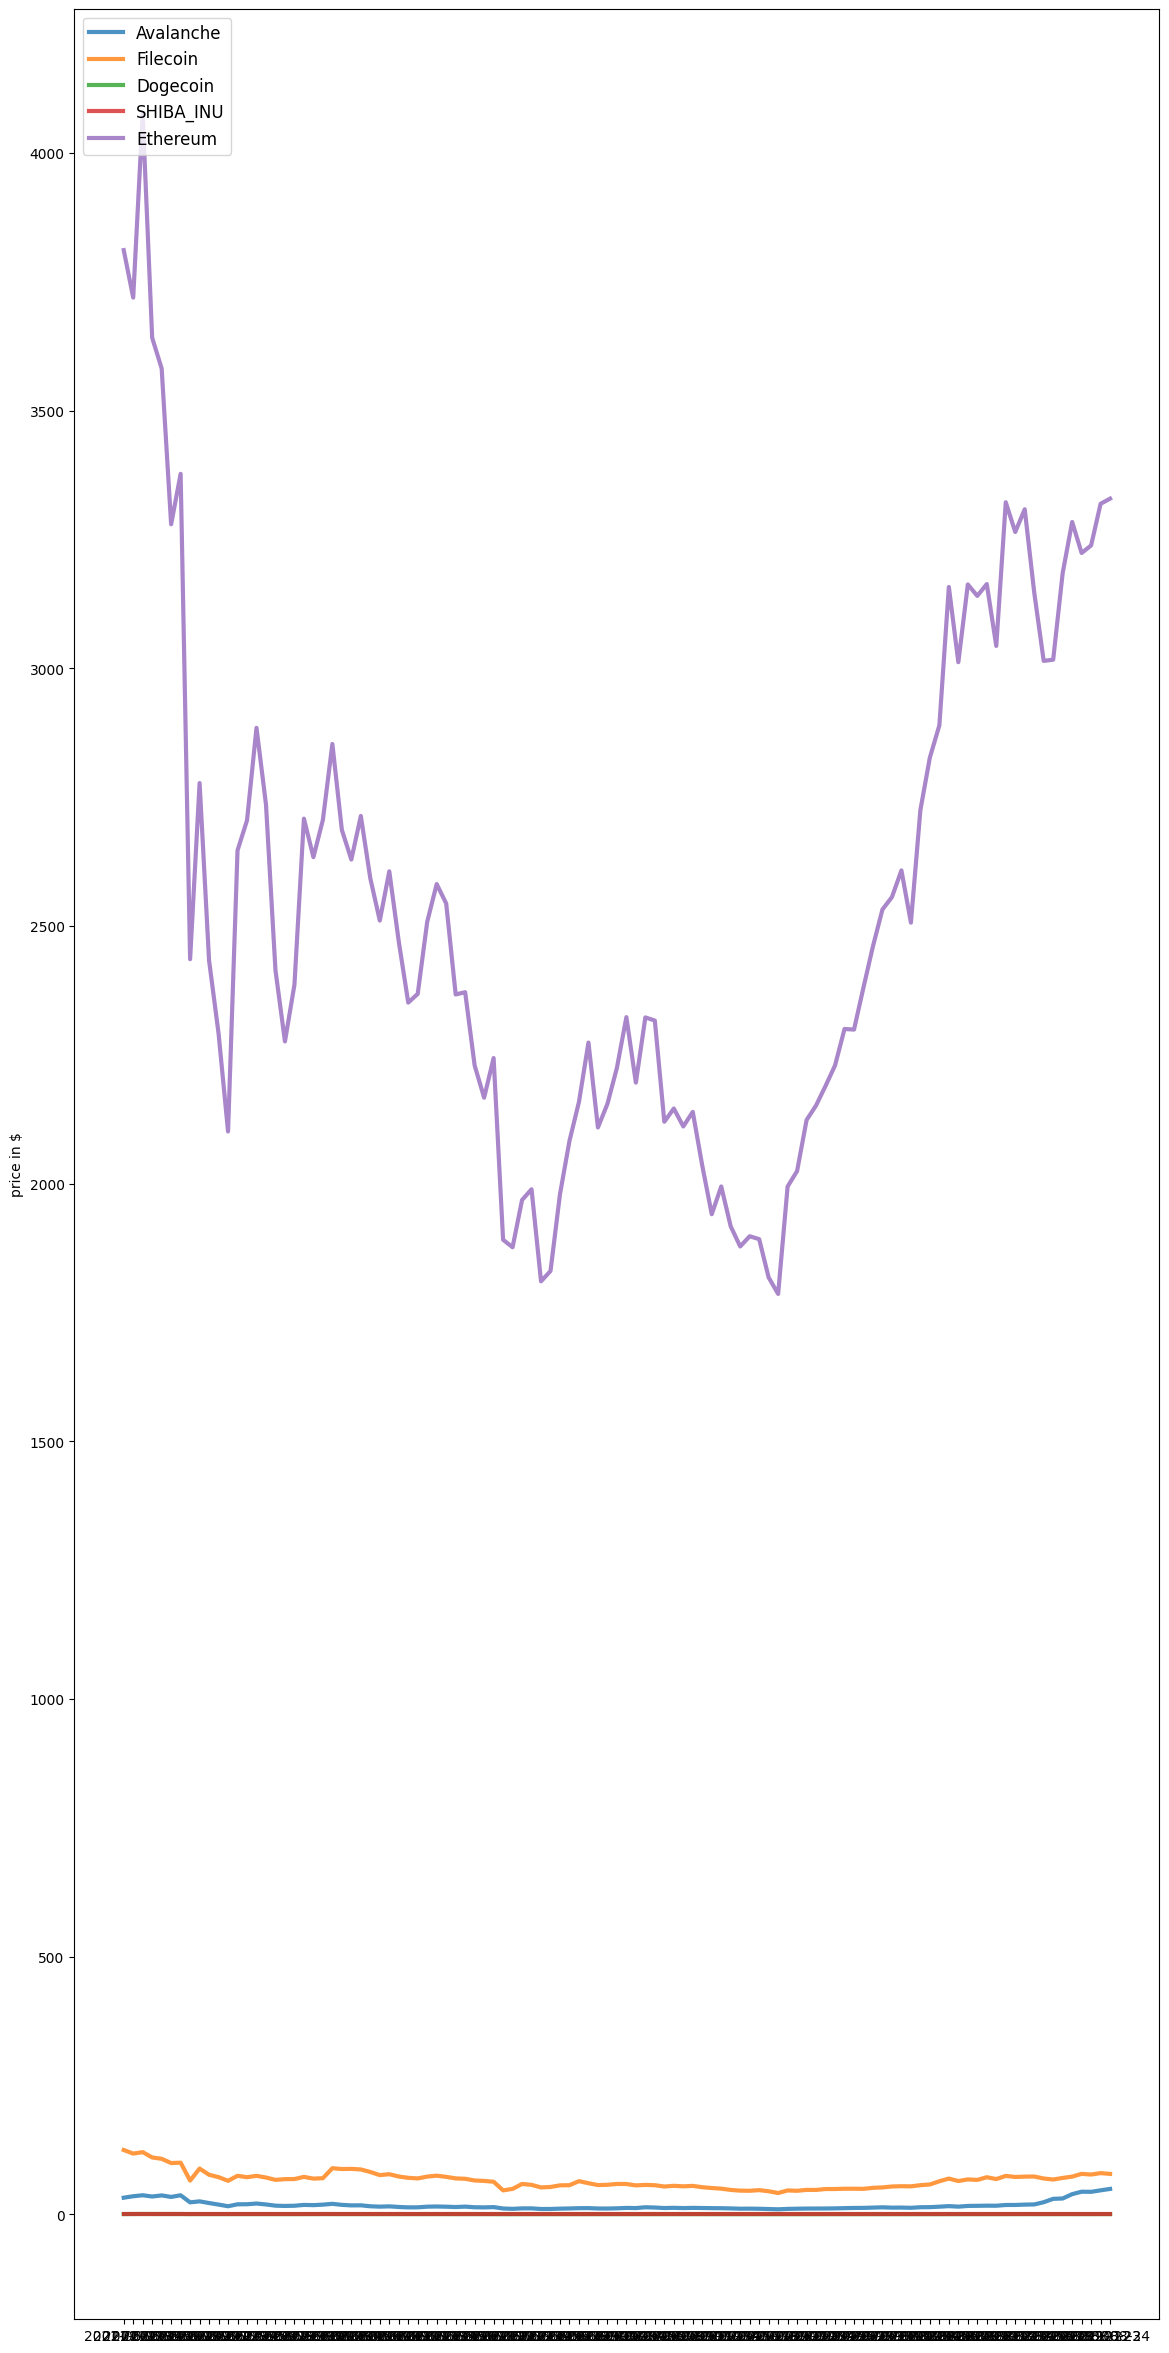

In [3]:
plt.figure(figsize=(14, 30))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

In [9]:
returns = table.pct_change()
print(returns)


mean_returns = returns.mean()
print(mean_returns)

cov_matrix = returns.cov()
print(cov_matrix)

num_portfolios = 25000
risk_free_rate = 0.0178

name        Avalanche  Filecoin  Dogecoin  SHIBA_INU  Ethereum    Monero
Date                                                                    
2021-05-12        NaN       NaN       NaN        NaN       NaN       NaN
2021-05-13   0.088308 -0.055872  0.251185   0.161968 -0.024175  0.026803
2021-05-14   0.055143  0.024028  0.149249  -0.125119  0.095644  0.026488
2021-05-15  -0.066613 -0.085648 -0.093164  -0.156607 -0.106427 -0.073314
2021-05-16   0.061793 -0.023848  0.010986   0.150870 -0.016347  0.022383
...               ...       ...       ...        ...       ...       ...
2021-08-20   0.274567  0.036596 -0.006838   0.019185  0.031207  0.067559
2021-08-21   0.121926  0.073344 -0.049074  -0.043529 -0.018345  0.020624
2021-08-22  -0.005708 -0.016828  0.032757   0.008610  0.004572  0.063495
2021-08-23   0.066820  0.035788  0.014949  -0.001220  0.024945  0.040167
2021-08-24   0.058975 -0.019029 -0.015956  -0.017094  0.003006  0.003966

[105 rows x 6 columns]
name
Avalanche    0.008121


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.36
Annualised Volatility: 1.26


name        Avalanche  Filecoin  Dogecoin  SHIBA_INU  Ethereum  Monero
allocation      69.08      1.19      6.83      11.53      9.18    2.19
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.11
Annualised Volatility: 1.06


name        Avalanche  Filecoin  Dogecoin  SHIBA_INU  Ethereum  Monero
allocation       1.34     17.11      8.51       7.14     62.04    3.85


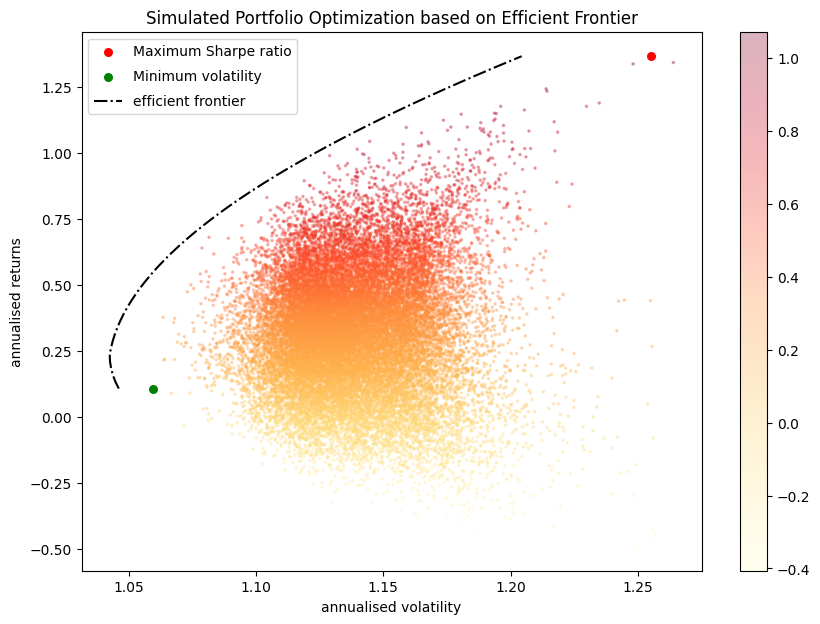

In [10]:

class portfolio_optimizer():

    def __init__(self, mean_returns, cov_matrix, risk_free_rates):
        """
        Args:
            mean_returns (list): mean return of individual stocks in portfolio, where mean_returns[i] accesses the weight of the i-th asset
            cov_matrix: matrix of dimension (N * N): where N is the number of individual stocks in the portfolio
            risk_free_rate (float)
        """
        self.mean_returns = mean_returns
        self.cov_matrix = cov_matrix
        self.risk_free_rate = risk_free_rates


    def annualize_portfolio(self, weights):
        """
        Output annualized standard deviation of the portfolio and annualized returns 
        Args:
            weights (list): weight of individual stocks in portfolio, where weights[i] accesses the weight of the i-th asset
        """
        portfolio_return = np.sum(self.mean_returns * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(self.cov_matrix, weights))) * np.sqrt(252)
        return portfolio_std_dev, portfolio_return
    
    def random_portfolios(self, num_portfolios):
        """
        Generates a number of random portfolio, stored in variable 'results'
        Args:
            num_portfolios (int): number of portfolios to generate
        """
        results = np.zeros((3,num_portfolios))
        weights_record = []
        for i in range(num_portfolios):
            weights = np.random.random(len(self.mean_returns))
            weights /= np.sum(weights)
            weights_record.append(weights)
            portfolio_std_dev, portfolio_return = self.annualize_portfolio(weights)
            results[0,i] = portfolio_std_dev # portfolio standard deviation
            results[1,i] = portfolio_return # portfolio returns
            results[2,i] = (portfolio_return - self.risk_free_rate) / portfolio_std_dev # sharpe ratio 
        #print(weights_record)
        return results, weights_record


    def min_variance(self):
        num_assets = len(self.mean_returns)
        args = (self.mean_returns, self.cov_matrix)
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bound = (0.0,1.0)
        bounds = tuple(bound for asset in range(num_assets))

        def portfolio_volatility(weights, mean_returns, cov_matrix):
            """
            Output the annualized volatility of the portfolio
            """
            return self.annualize_portfolio(weights)[0]

        result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                            method='SLSQP', bounds=bounds, constraints=constraints)
        return result

    def neg_sharpe_ratio(self, weights):
        p_var, p_ret = self.annualize_portfolio(weights)
        return -(p_ret - self.risk_free_rate) / p_var

    def max_sharpe_ratio(self):
        num_assets = len(self.mean_returns)
        args = (self.mean_returns, self.cov_matrix, self.risk_free_rate)
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bound = (0.0,1.0)
        bounds = tuple(bound for asset in range(num_assets))
        result = sco.minimize(self.neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                            method='SLSQP', bounds=bounds, constraints=constraints)
        return result

    def efficient_return(self, target):
        num_assets = len(self.mean_returns)
        args = (self.mean_returns, self.cov_matrix)

        def portfolio_return(weights):
            return self.annualize_portfolio(weights)[1]
            
        def portfolio_volatility(weights, mean_returns, cov_matrix):
            """
            Output the annualized volatility of the portfolio
            """
            return self.annualize_portfolio(weights)[0]

        constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0,1) for asset in range(num_assets))
        result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
        return result

    def efficient_frontier(self, returns_range):
        efficients = []
        for ret in returns_range:
            efficients.append(self.efficient_return(ret))
        return efficients

    def random_portfolio_sampler(self, num_portfolios):
        """
        Sample random portfolios and calculate their associated returns
        """
        
        ret = []
        results, weights = self.random_portfolios(num_portfolios)
        for weight in weights:
            portfolio_std_dev, portfolio_return = self.annualize_portfolio(weight)
            ret.append(portfolio_return)
        return np.mean(ret)


    def calculate_portfolio_returns(self, weights):
        """
        Given a weights array, compute the returns of the portfolio
        """
        portfolio_std_dev, portfolio_return = self.annualize_portfolio(weights)
        return portfolio_return


    def display(self, num_portfolios, table):
        """


        """
        results, weights = self.random_portfolios(num_portfolios)
        
        max_sharpe_idx = np.argmax(results[2])
        sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
        max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])

        max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
        max_sharpe_allocation = max_sharpe_allocation.T
        
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation = min_vol_allocation.T
        
        print("-"*80)
        print("Maximum Sharpe Ratio Portfolio Allocation\n")
        print("Annualised Return:", round(rp,2))
        print("Annualised Volatility:", round(sdp,2))
        print("\n")
        print(max_sharpe_allocation)
        print("-"*80)
        print("Minimum Volatility Portfolio Allocation\n")
        print("Annualised Return:", round(rp_min,2))
        print("Annualised Volatility:", round(sdp_min,2))
        print("\n")
        print(min_vol_allocation)
        
        plt.figure(figsize=(10, 7))
        plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlOrRd', marker='.', s=10, alpha=0.3)
        plt.colorbar()
        plt.scatter(sdp,rp,marker='o',color='r',s=30, label='Maximum Sharpe ratio')
        plt.scatter(sdp_min,rp_min,marker='o',color='g',s=30, label='Minimum volatility')

        max_vol_idx = np.argmax(results[1])
        rp_max = results[1,max_vol_idx]
        target = np.linspace(rp_min, rp_max, 50)
        efficient_portfolios = self.efficient_frontier(target)
        plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
        plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
        plt.xlabel('annualised volatility')
        plt.ylabel('annualised returns')
        plt.legend(labelspacing=0.8)


MC = portfolio_optimizer(mean_returns, cov_matrix, risk_free_rate)
MC.display(num_portfolios, table)
#display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
!pip install cvxpy
import cvxpy as cp

def optimize_portfolio_weights_min_volatility(len_prices_data: int, covariance_matrix: list):
    # portfolio volatility = sqrt(w.transposed * covar-matrix * w) = sqrt(variance)
    # We will minimize variance (volatility^2)

    # Generate weight-variables and save them in "weights" -> will be optimized values
    weights = cp.Variable(len_prices_data)

    # Create objective "risk" to be minimized:
    # See here: https://www.cvxpy.org/examples/basic/quadratic_program.html
    # that (1/2)*x.transposed*P*x+q.transposed*x is equal to (1/2)*cp.quad_form(x, P) + q.T @ x
    # This means that w.transposed() * covar-matrix * w (our risk measure "variance")
    #   is equal to cp.quad_form(weights, covariance_matrix)
    objective = cp.quad_form(weights, covariance_matrix)

    # Create constraints: sum of weights should be 1 and only long assets (every weight > 0)
    constraint = [sum(weights) == 1]
    for i in range(len_prices_data):
        constraint.append(weights[i] >= 0)

    # Solve formulated problem with cvxpy library
    problem = cp.Problem(cp.Minimize(objective), constraint)
    problem.solve()
    # Save optimized weight-values in "optimized_weights"
    optimized_weights = []
    for i in range(len(weights.value)):
        optimized_weights.append(weights.value[i])
    # Return solution
    return optimized_weights


optimize_portfolio_weights_min_volatility(45, cov_matrix)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 117.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 KB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 91.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


[8.852165140485192e-06,
 1.1512657315733288e-05,
 1.7977755281110985e-06,
 1.196053404884689e-05,
 8.713420123264305e-06,
 0.2593826628599806,
 1.0446107484101048e-05,
 0.0003885676660055563,
 1.2660489356885276e-05,
 1.0098689504669318e-05,
 1.2447465870880624e-05,
 1.1468391961299798e-05,
 1.2868928598040656e-05,
 6.361679382519522e-06,
 7.916576727616518e-08,
 1.1416374357267667e-05,
 3.833199694122156e-05,
 1.948579738038652e-05,
 1.1030317011485279e-05,
 5.504598344705456e-06,
 1.4224576819948691e-05,
 6.534115145614687e-06,
 8.718721393457045e-06,
 1.2338461215601629e-05,
 1.4647569260086112e-05,
 7.5107170721370246e-06,
 1.4961654641849824e-05,
 0.00020220797145967538,
 9.310946161946093e-06,
 0.0003206706415722812,
 7.356396798661597e-06,
 1.4101066808172768e-05,
 1.879302421923336e-05,
 1.27231649038361e-05,
 1.0669478479031885e-05,
 1.038116827446082e-05,
 0.42030027734528824,
 1.4874885212590746e-05,
 1.1758903969217736e-05,
 0.318965805901305,
 8.163918396375699e-06,
 1.153

In [12]:
lstm_returns = lstm_preds.pct_change()
lstm_mean_returns = lstm_returns.mean()
lstm_cov_matrix = lstm_returns.cov()
lstm_cov_matrix

,Aave,Binance_Coin,Bitcoin,Bitcoin_Cash,Cardano,Chainlink,Dai,Dash,Dogecoin,EOS,Ethereum,IOTA,Litecoin,Maker,Monero,THETA,Tezos,Tron,VeChain
Aave,1.576581e-03,1.625822e-04,-1.689267e-04,6.257439e-05,1.277905e-04,1.779486e-04,-1.204422e-07,-1.292305e-04,-1.272729e-03,-7.658865e-04,5.387828e-04,6.257395e-04,2.303439e-04,-5.278435e-05,4.348547e-04,8.535259e-05,-9.960915e-05,1.069005e-04,8.708250e-04
Binance_Coin,1.625822e-04,7.091230e-04,6.088118e-05,2.386194e-04,-6.454938e-06,-2.308163e-04,-1.851606e-07,2.614822e-04,9.379045e-04,2.885347e-04,1.442597e-04,4.011460e-04,-1.491489e-05,5.800929e-05,1.249854e-04,9.148595e-05,1.903360e-04,2.515866e-04,-2.328963e-04
Bitcoin,-1.689267e-04,6.088118e-05,5.793731e-04,3.474855e-04,-2.050467e-05,1.152469e-04,-4.035295e-08,2.930636e-04,1.048442e-03,2.205702e-04,4.963687e-05,1.499382e-04,1.987433e-04,6.637076e-05,7.054002e-05,1.869315e-04,8.531861e-05,1.027437e-04,1.128044e-04
Bitcoin_Cash,6.257439e-05,2.386194e-04,3.474855e-04,2.166593e-03,-4.409715e-04,2.702733e-04,-4.102389e-07,7.497651e-04,2.834440e-03,9.770439e-05,1.668477e-04,-2.891577e-04,2.319965e-04,6.923727e-05,-4.064324e-05,1.997248e-04,-3.355941e-04,-2.084966e-04,-2.495789e-04
Cardano,1.277905e-04,-6.454938e-06,-2.050467e-05,-4.409715e-04,8.805044e-04,1.426096e-04,1.498779e-07,1.064205e-05,-4.853056e-04,6.105031e-04,2.939127e-05,3.428494e-05,-1.289686e-04,7.185913e-05,4.279280e-05,-7.311521e-05,2.652549e-06,-2.695266e-05,6.784383e-04
Chainlink,1.779486e-04,-2.308163e-04,1.152469e-04,2.702733e-04,1.426096e-04,2.230203e-03,1.167630e-07,-8.626984e-05,-1.861967e-04,4.801250e-05,1.538623e-04,2.174542e-04,-2.529209e-05,1.571707e-04,4.205104e-04,-7.539152e-05,2.982268e-04,2.443049e-04,8.895277e-04
Dai,-1.204422e-07,-1.851606e-07,-4.035295e-08,-4.102389e-07,1.498779e-07,1.167630e-07,6.706467e-10,1.395391e-07,-3.290559e-07,3.488023e-07,-8.942652e-08,-1.020664e-07,-1.648497e-08,1.270140e-07,5.157362e-08,1.329595e-07,1.796340e-07,1.788226e-07,4.295518e-08
Dash,-1.292305e-04,2.614822e-04,2.930636e-04,7.497651e-04,1.064205e-05,-8.626984e-05,1.395391e-07,2.594557e-03,2.326969e-03,9.700742e-04,-5.009187e-05,-1.275785e-04,2.452666e-04,1.682866e-04,-4.517378e-05,-1.376709e-04,2.149864e-04,1.843233e-04,-2.262566e-04
Dogecoin,-1.272729e-03,9.379045e-04,1.048442e-03,2.834440e-03,-4.853056e-04,-1.861967e-04,-3.290559e-07,2.326969e-03,1.916625e-02,3.285427e-03,-2.707764e-04,-2.506014e-04,1.600306e-03,-9.315709e-05,1.909221e-04,-5.888009e-04,3.959814e-04,6.067023e-04,-1.484597e-03
EOS,-7.658865e-04,2.885347e-04,2.205702e-04,9.770439e-05,6.105031e-04,4.801250e-05,3.488023e-07,9.700742e-04,3.285427e-03,5.054832e-03,-8.159806e-05,4.645063e-04,2.558640e-05,3.451319e-04,6.955059e-05,1.798338e-04,8.947016e-04,-5.105959e-04,-1.731357e-04


In [9]:
lstm_mean_returns

Aave           -0.003412
Binance_Coin   -0.003184
Bitcoin        -0.000067
Bitcoin_Cash   -0.001620
Cardano        -0.002255
Chainlink      -0.006769
Dai             0.000002
Dash           -0.004225
Dogecoin       -0.003921
EOS            -0.005917
Ethereum       -0.000453
IOTA           -0.003314
Litecoin       -0.003509
Maker          -0.003719
Monero         -0.001025
THETA          -0.002140
Tezos          -0.002988
Tron           -0.001828
VeChain        -0.004687
dtype: float64

In [13]:
lstm_preds.pct_change()

,Aave,Binance_Coin,Bitcoin,Bitcoin_Cash,Cardano,Chainlink,Dai,Dash,Dogecoin,EOS,Ethereum,IOTA,Litecoin,Maker,Monero,THETA,Tezos,Tron,VeChain
date,,,,,,,,,,,,,,,,,,,
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-02,0.044949,-0.029679,-0.032063,-0.028699,0.051680,0.019910,0.000032,-0.055077,0.071077,0.026035,0.020147,0.005455,0.016041,-0.002505,0.023088,-0.000508,-0.048193,0.019648,-0.002272
2021-06-03,0.010641,-0.015740,0.032834,-0.069288,-0.024630,0.024391,0.000024,0.017915,-0.023108,-0.018943,0.011954,0.037129,0.026078,-0.002172,0.021413,-0.024286,0.059780,0.029286,0.017868
2021-06-04,0.035903,-0.011533,0.008260,0.016713,0.004317,0.012444,0.000011,-0.001178,0.038180,0.006625,0.000667,0.110669,0.026917,-0.009318,0.040394,-0.004545,-0.049054,0.017167,0.078574
2021-06-05,0.026129,0.032676,0.008780,0.039245,-0.000777,0.010792,0.000008,0.008744,0.007997,-0.019821,0.021052,0.007147,-0.002003,-0.004011,0.028213,0.056632,0.010994,0.028445,0.013921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28,0.044812,-0.030045,-0.016548,-0.103984,0.041874,0.014846,0.000020,0.056907,-0.158735,-0.006113,0.003146,0.010974,0.043832,-0.007826,-0.003493,-0.041220,-0.063879,0.082063,0.099757
2021-07-29,-0.024544,-0.022918,0.068167,0.074726,0.002958,0.047419,0.000058,0.015508,-0.011341,0.080019,0.036001,-0.035934,0.018184,0.060097,0.015620,0.084277,-0.013866,0.025386,-0.053295
2021-07-30,0.011742,0.021028,0.048377,0.046491,0.020747,0.037957,-0.000028,-0.040646,0.158239,-0.003109,0.018947,0.110851,0.012734,-0.044535,0.028295,-0.000028,0.040364,-0.073803,0.146051


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: -0.61
Annualised Volatility: 0.44


            Aave  Binance_Coin  Bitcoin  Bitcoin_Cash  Cardano  Chainlink  \
allocation  0.22          2.19    11.19          5.43     6.37       0.52   

             Dai  Dash  Dogecoin   EOS  Ethereum  IOTA  Litecoin  Maker  \
allocation  7.13  13.5     14.04  3.66      1.33  4.62      0.72   2.73   

            Monero  THETA  Tezos  Tron  VeChain  
allocation   14.32   0.32   2.65  7.91     1.15  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.61
Annualised Volatility: 0.2


            Aave  Binance_Coin  Bitcoin  Bitcoin_Cash  Cardano  Chainlink  \
allocation  2.21          1.15      9.5          4.76     9.77       6.45   

              Dai  Dash  Dogecoin   EOS  Ethereum  IOTA  Litecoin  Maker  \
allocati

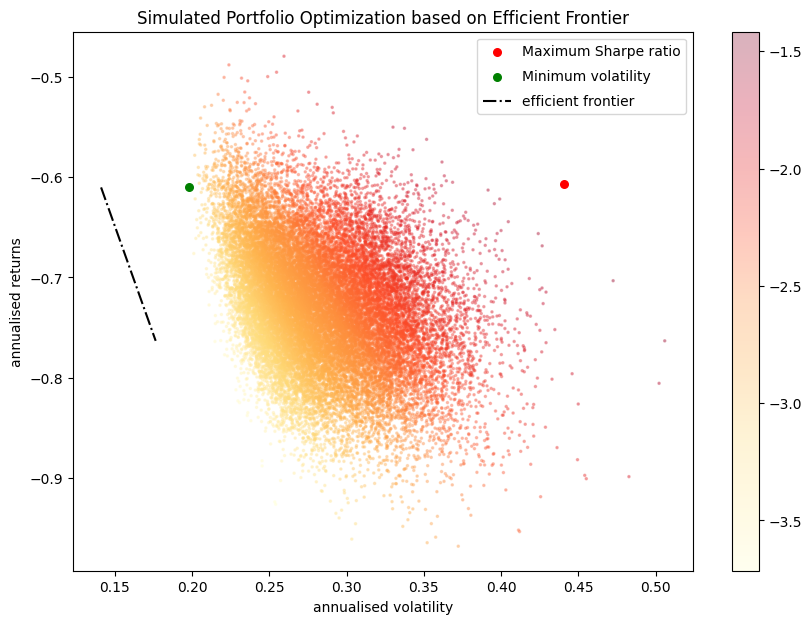

In [16]:
num_portfolios = 25000
risk_free_rate = 0.0178
MC2 = portfolio_optimizer(lstm_mean_returns, lstm_cov_matrix, risk_free_rate)
MC2.display(num_portfolios, lstm_preds)

In [2]:
df_ = df[['Date', 'Price', 'name']]
df_['Date'] = pd.to_datetime(df_['Date'])  


mask = (df_['Date'] > '2021-5-31') & (df_['Date'] <= '2021-7-31')
print(df_.loc[mask])


df_ = df

# df_ = df_.set_index('Date')
table = df_.pivot_table(index='Date', columns='name', values='Price', aggfunc='mean')
table
table


table = table[["Avalanche", "Binance_Coin", "Bitcoin", "Bitcoin_Cash", "Cardano", "Chainlink", "Dai", "Dash", "Dogecoin", "EOS", "Ethereum", "IOTA", "Litecoin", "Maker", "Monero", "THETA", "Tezos", "Tron", "VeChain"]]

table = table[table.isnull().sum(axis=1) == 0]
table = table.dropna(axis='columns')


table

           Date      Price      name
748  2021-06-01  13.752900    Cosmos
749  2021-06-02  14.841600    Cosmos
750  2021-06-03  16.658900    Cosmos
751  2021-06-04  15.077200    Cosmos
752  2021-06-05  14.857200    Cosmos
...         ...        ...       ...
1515 2021-07-27   0.204910  Dogecoin
1516 2021-07-28   0.205078  Dogecoin
1517 2021-07-29   0.202081  Dogecoin
1518 2021-07-30   0.207947  Dogecoin
1519 2021-07-31   0.206627  Dogecoin

[5982 rows x 3 columns]
/tmp/ipykernel_81/3501455822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Date'] = pd.to_datetime(df_['Date'])


name,Avalanche,Binance_Coin,Bitcoin,Bitcoin_Cash,Cardano,Chainlink,Dai,Dash,Dogecoin,EOS,Ethereum,IOTA,Litecoin,Maker,Monero,THETA,Tezos,Tron,VeChain
Date,,,,,,,,,,,,,,,,,,,
2020-12-25,2.95,33.18,24689.6,319.00,0.157516,11.56,1.00498,103.17,0.004563,2.6659,626.93,0.29192,127.643,536.26,159.147,1.2853,2.02821,0.028540,0.014600
2020-12-26,2.92,33.59,26454.4,323.52,0.158322,10.97,1.00187,107.91,0.004508,2.6118,636.58,0.28576,129.620,544.76,167.908,1.6666,1.97939,0.027783,0.016454
2020-12-27,2.90,33.68,26261.3,338.22,0.154639,12.14,1.00236,107.39,0.004548,2.7175,683.71,0.29721,127.812,571.16,156.944,1.3493,1.99977,0.028883,0.016542
2020-12-28,2.96,35.94,27057.8,361.41,0.176428,12.62,1.00302,107.17,0.004594,2.7643,730.05,0.30512,129.822,585.24,166.468,1.5547,2.12060,0.029591,0.020148
2020-12-29,2.92,39.10,27376.0,352.26,0.190995,11.76,1.00286,103.91,0.004488,2.6394,731.76,0.30167,128.751,565.62,161.588,1.4332,2.04232,0.027661,0.021111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,39.04,454.87,49324.0,693.89,2.455280,28.69,1.00044,232.77,0.313874,5.4632,3284.21,1.10212,183.568,3814.53,282.096,7.2719,3.72707,0.090286,0.133067
2021-08-21,43.80,448.64,48875.8,675.40,2.436019,27.84,1.00009,237.24,0.298471,5.3521,3223.96,1.06775,179.698,3866.42,287.914,7.2617,3.69158,0.087986,0.128121
2021-08-22,43.55,448.68,49254.5,672.39,2.706848,27.98,0.99918,255.12,0.308248,5.4145,3238.70,1.16304,185.929,3802.95,306.195,7.3415,3.79908,0.087953,0.128253


In [4]:
returns = table.pct_change()
print(returns)


mean_returns = returns.mean()
print(mean_returns)

cov_matrix = returns.cov()
print(cov_matrix)

num_portfolios = 25000
risk_free_rate = 0.0178

name        Avalanche  Binance_Coin   Bitcoin  Bitcoin_Cash   Cardano  \
Date                                                                    
2020-12-25        NaN           NaN       NaN           NaN       NaN   
2020-12-26  -0.010169      0.012357  0.071479      0.014169  0.005117   
2020-12-27  -0.006849      0.002679 -0.007299      0.045438 -0.023263   
2020-12-28   0.020690      0.067102  0.030330      0.068565  0.140902   
2020-12-29  -0.013514      0.087924  0.011760     -0.025318  0.082566   
...               ...           ...       ...           ...       ...   
2021-08-20   0.274567      0.054355  0.054926      0.051030  0.006691   
2021-08-21   0.121926     -0.013696 -0.009087     -0.026647 -0.007845   
2021-08-22  -0.005708      0.000089  0.007748     -0.004457  0.111177   
2021-08-23   0.066820      0.113912  0.005790      0.009384  0.077016   
2021-08-24   0.058975     -0.009724  0.004612     -0.011787 -0.006012   

name        Chainlink       Dai      Dash  Dogecoi

In [60]:
MC = portfolio_optimizer(mean_returns, cov_matrix, risk_free_rate)

MC_result = MC.random_portfolio_sampler(num_portfolios)
print(MC_result)

# 
simulated_allocations  = np.array([1.15, 1.57, 15.87, 16.1, 0.69, 0.83, 6.12, 0.39, 16.25, 1.21, 3.55, 3.3, 4.8, 4.43, 3.71, 1.63, 10.39, 2.75, 5.24])
highest_sharpe_result = MC.calculate_portfolio_returns(simulated_allocations / 100)
print(highest_sharpe_result)


print("The improvement yielded from using the maximum sharpe ratio portfolio is")
print(f"{(highest_sharpe_result - MC_result) / MC_result * 100} percents")



2.5108992292307057
2.8301754379909374
The improvement yielded from using the maximum sharpe ratio portfolio is
12.715612201531965 percents


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b27e67ee-f5df-4b4c-8b19-dd7f96df61c4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>